# Problem Statement:McDonalds case study

In [9]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
#Read the dataset
A = pd.read_csv("C:/Users/Admin/Downloads/McD.csv")

In [13]:
#Preview of data:
A.head()

,Unnamed: 0,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [14]:
#Separating categorical and continous variables:
cat=[]
con=[]
for i in A:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
        

In [15]:
cat

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'VisitFrequency',
 'Gender']

In [16]:
con

['Unnamed: 0', 'Age']

In [17]:
#Defining X and Y:
Y=A[["Like"]]
X=A.drop(labels=["Like"],axis=1)

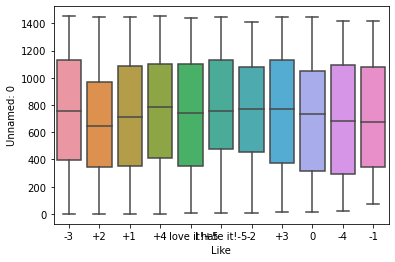

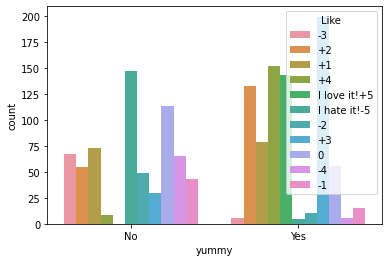

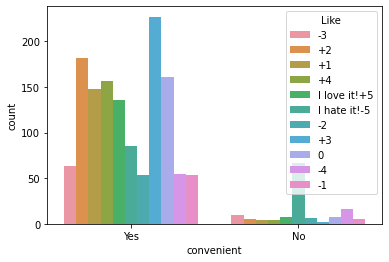

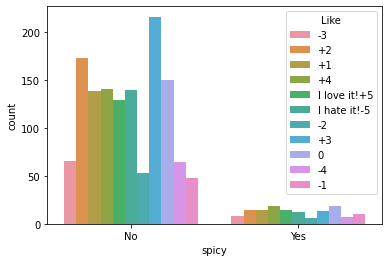

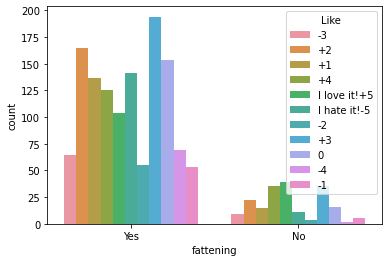

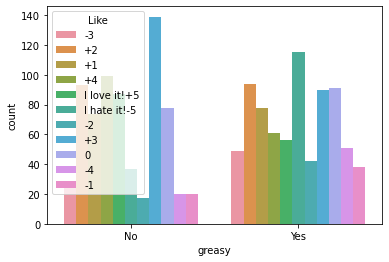

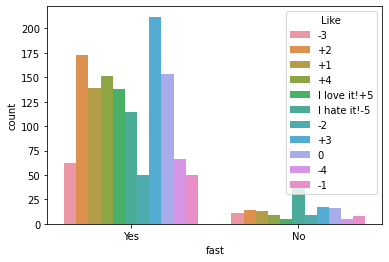

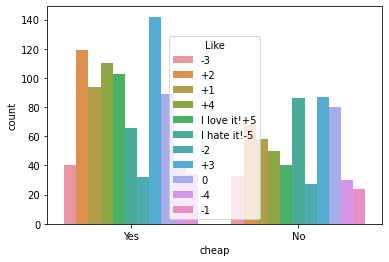

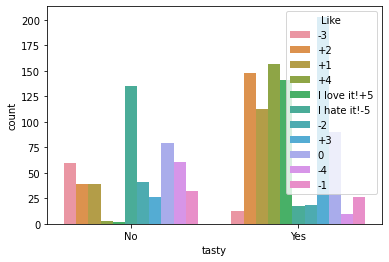

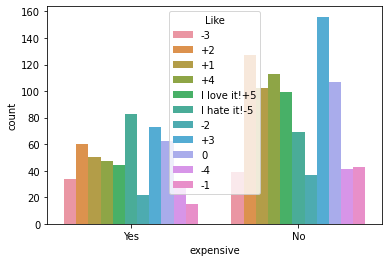

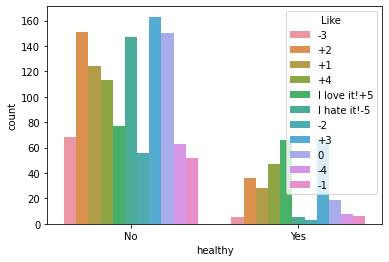

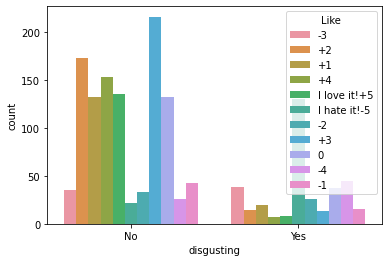

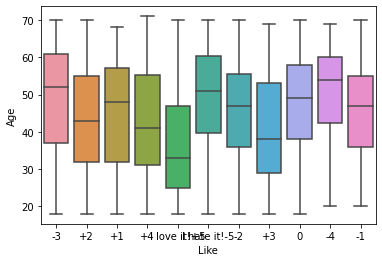

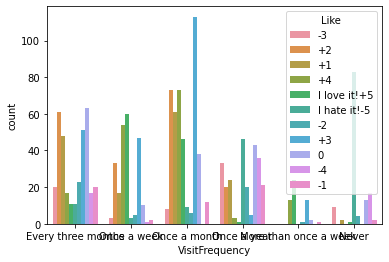

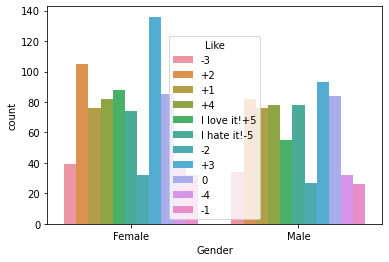

In [18]:
#Data visualisations:
from warnings import filterwarnings
filterwarnings("ignore")
for i in X.columns:
    if(X[i].dtypes=="object"):
        sb.countplot(X[i],hue=Y.Like)
        plt.show()
    else:
        sb.boxplot(Y.Like,X[i])
        plt.show()

In [21]:
#Checking for missing data:
A.isna().sum()

Unnamed: 0        0
yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [22]:
#Preprocessing data : created data_prep function under ml_txt module
from ml_txt import data_prep
Xnew=data_prep(A)

In [23]:
Xnew

,Unnamed: 0,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,spicy_No,spicy_Yes,fattening_No,fattening_Yes,...,Like_I hate it!-5,Like_I love it!+5,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Female,Gender_Male
0,-1.730859,1.153258,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,-1.728475,0.449839,0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-1.726091,1.223600,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,-1.723707,1.715993,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,-1.721323,0.309156,1,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.721323,0.168472,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
1449,1.723707,-0.605289,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1450,1.726091,0.520181,0,1,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1451,1.728475,-0.253579,0,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [35]:
#PCA
from sklearn.decomposition import PCA

In [36]:
pca = PCA()
PCs = pca.fit_transform(Xnew)

In [37]:
pca.explained_variance_ratio_

array([1.67355221e-01, 1.38414598e-01, 1.23615077e-01, 9.10211152e-02,
       6.01875521e-02, 4.98331832e-02, 4.16986664e-02, 3.35391772e-02,
       2.96920268e-02, 2.55459993e-02, 2.41998662e-02, 2.06601690e-02,
       1.92496876e-02, 1.88304938e-02, 1.77178659e-02, 1.72985622e-02,
       1.56476258e-02, 1.49867424e-02, 1.44751836e-02, 1.34025524e-02,
       1.26776453e-02, 1.01704191e-02, 9.82175747e-03, 6.62838467e-03,
       6.06076410e-03, 5.11070947e-03, 4.86876923e-03, 4.70834613e-03,
       2.58183942e-03, 3.30049978e-32, 9.71422169e-33, 3.66208168e-33,
       1.31969967e-33, 1.24762129e-33, 1.24762129e-33, 1.24762129e-33,
       1.24762129e-33, 1.24762129e-33, 1.24762129e-33, 1.24762129e-33,
       1.24762129e-33, 1.24762129e-33, 7.15448686e-35])

In [38]:
PC = pd.DataFrame(data = PCs)
PC.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.269263,-1.507346,1.284316,-0.098033,-0.601353,0.544608,-0.631270,0.680723,-0.100626,0.188436,...,1.684839e-16,-2.675465e-16,-5.448152e-16,1.639680e-16,1.797988e-16,-2.801612e-16,1.501601e-16,2.571071e-16,5.318253e-16,-7.181796e-17
1,-0.344733,-0.790218,1.601187,-0.055468,-0.877057,-1.087338,-0.127872,0.624075,-0.314196,0.337404,...,2.363792e-16,-1.089000e-16,2.508597e-16,2.013084e-17,-2.912577e-16,-3.089059e-16,-8.444357e-17,3.065399e-16,4.504891e-16,-1.031252e-16
2,0.856185,-1.116424,1.652119,0.849624,-0.993016,-0.863368,0.786258,1.180368,0.868483,0.290231,...,-2.975968e-16,-3.121652e-16,2.231929e-16,3.083811e-16,-4.086399e-18,-2.116233e-16,-4.987443e-17,-1.573530e-16,3.250713e-16,1.800139e-16
3,0.351291,-1.728754,1.099994,-0.683057,-0.608047,-1.441427,0.616234,-0.498035,-1.059447,-0.389594,...,-7.386772e-16,2.580710e-16,3.102646e-16,4.172562e-16,-1.101640e-15,9.942241e-16,1.041029e-16,-6.613082e-16,-2.549598e-16,-1.439358e-16
4,0.423238,-0.939308,1.416368,-0.911365,0.957491,-0.051390,0.295801,0.038175,1.593511,0.127227,...,3.283207e-16,2.262113e-16,-1.554740e-16,-1.757010e-16,2.193041e-16,4.341580e-16,2.579035e-16,8.699954e-17,-7.388567e-16,7.166459e-17


In [39]:
PC.columns

RangeIndex(start=0, stop=43, step=1)

<BarContainer object of 43 artists>

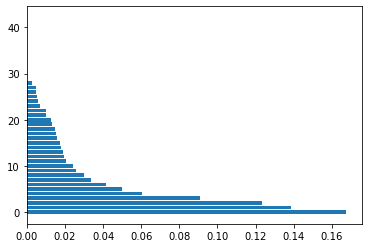

In [40]:
import matplotlib.pyplot as plt
plt.barh(PC.columns,pca.explained_variance_ratio_)

In [24]:
#To form Clusters(KMEANS algorithm):

In [25]:
B=Xnew[["cheap_Yes","expensive_Yes"]]


In [26]:
B

,cheap_Yes,expensive_Yes
0,1,1
1,1,1
2,0,1
3,1,0
4,1,0
...,...,...
1448,0,1
1449,1,0
1450,0,1
1451,1,0


In [48]:
#Defining 4 clusters initially:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(B)
model.labels_

array([2, 2, 1, ..., 1, 0, 1])

In [49]:
#this step tells which point belongs to which cluster:
B["Cluster"]=model.labels_

In [50]:
#over here those saying food is expensive are placed in cluster 1, food cheap in cluster 0,having mixed advice is in cluster 2;
B

,cheap_Yes,expensive_Yes,Cluster
0,1,1,2
1,1,1,2
2,0,1,1
3,1,0,0
4,1,0,0
...,...,...,...
1448,0,1,1
1449,1,0,0
1450,0,1,1
1451,1,0,0


In [41]:
model.cluster_centers_

array([[ 1.00000000e+00,  3.88578059e-16],
       [-7.77156117e-16,  1.00000000e+00],
       [ 3.33066907e-16,  1.11022302e-16],
       [ 1.00000000e+00,  1.00000000e+00]])